https://fr.wikipedia.org/wiki/Cat%C3%A9gorie:Rappeur_fran%C3%A7ais

In [114]:
from bs4 import BeautifulSoup as bs
import requests
import pandas as pd
import unidecode
import re
import os
import matplotlib.pyplot as plt
import nltk
from nltk.stem.snowball import FrenchStemmer

In [56]:
url="https://fr.wikipedia.org/wiki/Cat%C3%A9gorie:Rappeur_fran%C3%A7ais"
response = requests.get(url)

In [57]:
html = response.content

In [58]:
soup = bs(html, "html.parser")

In [59]:
# Trouver toutes les balises <li> contenant des chanteurs
chanteurs = [a.text for div in soup.find_all('div', class_='mw-category-group') for li in div.find_all('li') for a in li.find_all('a')]

In [60]:
print('{} chanteurs'.format(len(chanteurs)))

200 chanteurs


https://fr.wikipedia.org/w/index.php?title=Cat%C3%A9gorie:Rappeur_fran%C3%A7ais&pagefrom=Leck%0ALeck+%28rappeur%29#mw-pages

In [61]:
url_suite="https://fr.wikipedia.org/w/index.php?title=Cat%C3%A9gorie:Rappeur_fran%C3%A7ais&pagefrom=Leck%0ALeck+%28rappeur%29#mw-pages"
response_suite = requests.get(url_suite)

In [62]:
html_suite = response_suite.content

In [63]:
soup_suite = bs(html_suite, "html.parser")

In [64]:
chanteurs_suite = [a.text for div in soup_suite.find_all('div', class_='mw-category-group') for li in div.find_all('li') for a in li.find_all('a')]

In [65]:
print('{} chanteurs'.format(len(chanteurs_suite)))

194 chanteurs


In [66]:
type(chanteurs_suite)

list

In [67]:
chanteurs.extend(chanteurs_suite)

In [68]:
print('{} chanteurs'.format(len(chanteurs)))

394 chanteurs


In [111]:
# Extraire et afficher les noms des chanteurs
df = pd.DataFrame(columns=["Nom", "Chanson", "Paroles"])

base_url = "https://genius.com/artists/"
base_url_song = "https://genius.com/"

for chanteur in chanteurs:
        chanteur = chanteur.split(" (")[0]
        chanteur_tiret = unidecode.unidecode(chanteur.replace(" ", "-"))

        url_chanteur = base_url + chanteur_tiret
        response_chanteur = requests.get(url_chanteur)

        html_chanteur = response_chanteur.content
        soup_chanteur = bs(html_chanteur, "html.parser")
        songs = [div.text for div in soup_chanteur.find_all('div', class_='mini_card-title')]

        for song in songs:
                song_tiret = song.replace(" ", "-")
                song_tiret2 = song_tiret.replace("#", "")
                url_song = base_url_song + chanteur_tiret + "-" + unidecode.unidecode(song_tiret2) + "-lyrics"

                response_song = requests.get(url_song)
                html_song = response_song.content

                # Initialiser BeautifulSoup
                soup_song = bs(html_song, "html.parser")
                

                # Extraire les éléments contenant les paroles
                paroles_song = soup_song.find_all(['div'], class_=['Lyrics__Container-sc-1ynbvzw-1 kUgSbL'])

                # Combiner tous les éléments de texte
                paroles = " ".join([element.get_text() for element in paroles_song])
                paroles_temp = re.sub(r"\[.*?\]", " ", paroles)
                paroles_nettoyes = re.sub(r'(?<!^)(?=[A-Z])', ' ', paroles_temp)

                #print(f"url:  {url_song}")
                #print(f"chanteur:  {chanteur}")
                #print(f"chansons: {song}")
                #print(f"paroles: {paroles}")
                #print(f"paroles: {paroles_nettoyes}")
                if paroles_nettoyes:
                        df = pd.concat([df, pd.DataFrame({"Nom": [chanteur], "Chanson" : [song], "Paroles" : [paroles_nettoyes]})], ignore_index=True)
        break


In [112]:
df

,Nom,Chanson,Paroles
0,1PLIKÉ140,FREESTYLE HORS SÉRIE,"Gang, gang J'perds pas mon temps sur des ..."
1,1PLIKÉ140,CANADA,"Mmh, mmh, mmh, mmh Mmh, mmh, mmh L'habit n..."
2,1PLIKÉ140,FREESTYLE BATARD #2,"Partie 1 Beaucoup d'rappeurs, j'suis obligé..."
3,1PLIKÉ140,DANS MON ASSIETTE,Binks Beatz Il reste du te-shi sur le cou...
4,1PLIKÉ140,FREESTYLE BATARD #3,Comme d’habitude j’ai la bonbonne sur moi D...
5,1PLIKÉ140,LOPSA STORY,Elle utilise son corps comme si c'était un ...
6,1PLIKÉ140,FREESTYLE HORS SÉRIE #2,"Wouh, wouh Poh, poh Il m'faut une montagne..."
7,1PLIKÉ140,DOLCE VITA,"Chacun son métier, le mien, c'est d'ravitai..."
8,1PLIKÉ140,1PLIKTOI BIEN,"Si tu veux larsa, mets-toi à g'noux, y a d'..."


In [3]:

fichier_csv = 'C:/Users/david/Dropbox/Openclassrooms/IA/Projet 6/paroles 1.csv'

if os.path.exists(fichier_csv):
        os.remove(fichier_csv)
df.to_csv(fichier_csv, index=False)

NameError: name 'df' is not defined

In [88]:
dg = pd.read_csv('C:/Users/david/Dropbox/Openclassrooms/IA/Projet 6/paroles 1.csv', sep=',', low_memory=False)

In [89]:
for index, row in dg.iterrows():
    row["Paroles"] = re.sub(r'(?<!^)(?=[A-Z])', ' ', row["Paroles"])
    var = row["Paroles"]

In [90]:
print(var)

   Eddie  Brock,  Peter  Parker Le retour de  Pépés  Anglais Le  Z, le  Film  Est-ce réel ? ( Est-ce réel ?)  Je n'sais pas ( Je n'sais pas) La toupie tourn'ra ou s'arrêtera (ou s'arrêtera) Continuer tout droit ?  Je ne sais pas (je n'sais pas) J'prends le virage à gauche, je ne lackerai pas  (je n'lackerai pas) Est-ce réel ? ( Est-ce réel ?)  Je n'sais pas ( Je n'sais pas) La toupie tourn'ra ou s'arrêtera (ou s'arrêtera) Continuer tout droit ?  Je ne sais pas (je n'sais pas) J'prends le virage à gauche, je ne lackerai pas  (je n'lackerai pas)  Que du maka, dans la fête pas de bourbon Que des killu', dans la salle, pas d'maçons6.6.7,  N R M, drip  B G B C Jogging, claquettes, c'est pas  B C B G Fanta tropical, ajoute le tosé' Dans l'rap, dans la crypto', dans ça, j'veux bosser Eddie  Brock,  Peter  Parker, appelez-nous  Pépé P D F dans la cassette, en données cryptées J'ai kické car système, j'ai voulu quitter Faire des euros en mode illimité Avec  Chen dans la  A7 noire, la secte, dou

In [103]:
nltk.download('stopwords')
test = "Bonjour, je suis un texte d'exemple pour le cours d'Openclassrooms. Soyez attentifs à ce cours !"

nltk.word_tokenize(test)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\david\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


['Bonjour',
 ',',
 'je',
 'suis',
 'un',
 'texte',
 "d'exemple",
 'pour',
 'le',
 'cours',
 "d'Openclassrooms",
 '.',
 'Soyez',
 'attentifs',
 'à',
 'ce',
 'cours',
 '!']

In [92]:
tokenizer = nltk.RegexpTokenizer(r'\w+')
tokenizer.tokenize("Bonjour, je suis un texte d'exemple pour le cours d'Openclassrooms. Soyez attentifs à ce cours !")


['Bonjour',
 'je',
 'suis',
 'un',
 'texte',
 'd',
 'exemple',
 'pour',
 'le',
 'cours',
 'd',
 'Openclassrooms',
 'Soyez',
 'attentifs',
 'à',
 'ce',
 'cours']

In [93]:
tokenizer = nltk.RegexpTokenizer(r'\w+')

dg["Paroles cleaned"] = dg["Paroles"].apply(lambda x: unidecode.unidecode(x).lower())
dg["Paroles tokenized"] = dg["Paroles cleaned"].apply(tokenizer.tokenize)
print("ok")

ok


In [94]:
dg

,Nom,Chanson,Paroles,Paroles cleaned,Paroles tokenized
0,1PLIKÉ140,FREESTYLE HORS SÉRIE,"Gang, gang J'perds pas mon temps sur des ...","gang, gang j'perds pas mon temps sur des ...","[gang, gang, j, perds, pas, mon, temps, sur, d..."
1,1PLIKÉ140,CANADA,"Mmh, mmh, mmh, mmh Mmh, mmh, mmh L'habit n...","mmh, mmh, mmh, mmh mmh, mmh, mmh l'habit n...","[mmh, mmh, mmh, mmh, mmh, mmh, mmh, l, habit, ..."
2,1PLIKÉ140,FREESTYLE BATARD #2,"Partie 1 Beaucoup d'rappeurs, j'suis obligé...","partie 1 beaucoup d'rappeurs, j'suis oblige...","[partie, 1, beaucoup, d, rappeurs, j, suis, ob..."
3,1PLIKÉ140,DANS MON ASSIETTE,Binks Beatz Il reste du te-shi sur le cou...,binks beatz il reste du te-shi sur le cou...,"[binks, beatz, il, reste, du, te, shi, sur, le..."
4,1PLIKÉ140,FREESTYLE BATARD #3,Comme d’habitude j’ai la bonbonne sur moi D...,comme d'habitude j'ai la bonbonne sur moi d...,"[comme, d, habitude, j, ai, la, bonbonne, sur,..."
...,...,...,...,...,...
1674,Zuukou Mayzie,Docteur Lulu,"Risky Business Docteur Lulu J'débarque, ...","risky business docteur lulu j'debarque, ...","[risky, business, docteur, lulu, j, debarque, ..."
1675,Zuukou Mayzie,Pépé Anglais,"S/o le Flem Grr, paw, paw Crr, crr B G Bo...","s/o le flem grr, paw, paw crr, crr b g bo...","[s, o, le, flem, grr, paw, paw, crr, crr, b, g..."
1676,Zuukou Mayzie,Kevin Mitnick,Kevin Mitnick est un informaticien déjanté...,kevin mitnick est un informaticien dejante...,"[kevin, mitnick, est, un, informaticien, dejan..."
1677,Zuukou Mayzie,Vincent,"Le Z (le Z, le Z) Phénoménal, brillant,...","le z (le z, le z) phenomenal, brillant,...","[le, z, le, z, le, z, phenomenal, brillant, pe..."


Ah, ça commence à être mieux ! Maintenant qu'on a bien séparé notre texte en unité de mots (tokens) on peut l'appliquer au jeu de données qui nous intéresse, et compter la fréquence d'apparition des différents mots pour avoir une idée du champ lexical. On effectue ce comptage par artiste pour comparer.

In [95]:
dg_stat2 = pd.DataFrame(columns=["Nom", "Fréquence", "Stats"])
old_name = ''
f = []
s = 0
first = True
for index, row in dg.iterrows():
    nom = row['Nom']
    if nom != old_name and not first:
        freq = nltk.FreqDist(f)
        dg_stat2 = pd.concat([dg_stat2, pd.DataFrame({"Nom": [old_name], "Fréquence" : [freq], "Stats" : [s]})], ignore_index=True)
        f = row['Paroles tokenized'].copy()
        s = len(row['Paroles tokenized'])
    else:
        first = False
        f.extend(row['Paroles tokenized'])
  
        s += len(row['Paroles tokenized'])
    old_name = nom

if f:
    freq = nltk.FreqDist(f)
    dg_stat2 = pd.concat([dg_stat2, pd.DataFrame({"Nom": [old_name], "Fréquence" : [freq], "Stats" : [s]})], ignore_index=True)

dg_stat2



,Nom,Fréquence,Stats
0,1PLIKÉ140,"{'gang': 3, 'j': 399, 'perds': 7, 'pas': 134, ...",7740
1,2zer Washington,"{'he': 4, 'c': 15, 'est': 15, 'toi': 2, 'nesle...",776
2,20syl,"{'keep': 15, 'it': 34, 'on': 22, 'the': 62, 'l...",1161
3,Abd al Malik,"{'sur': 27, 'le': 72, 'detroit': 13, 'de': 125...",4103
4,Ademo,"{'j': 261, 'suis': 32, 'de': 64, 'la': 182, 'j...",5541
...,...,...,...
303,Ziak,"{'focus': 3, 'beatz': 3, 'han': 2, '3endi': 2,...",4986
304,ZKR,"{'b': 13, 'r': 24, 'p': 46, 'nouveau': 17, 'ro...",15349
305,Zola,"{'j': 308, 'connais': 3, 'des': 38, 'meufs': 7...",5015
306,Zoxea,"{'ca': 8, 'y': 4, 'est': 7, 'je': 9, 'l': 4, '...",552


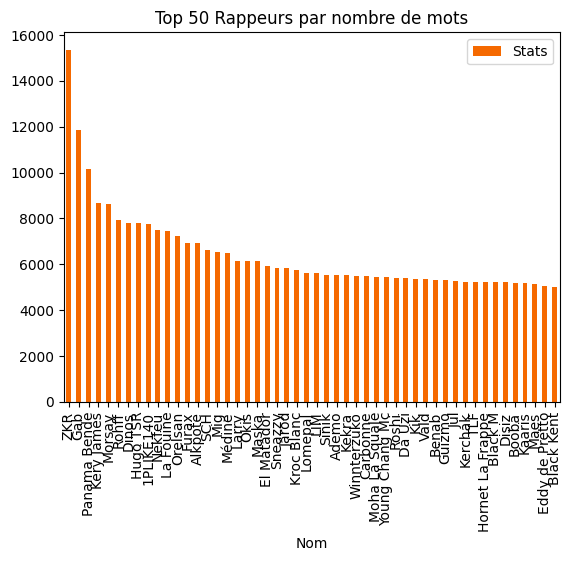

In [96]:
# Trier le DataFrame par la colonne 'Stats' en ordre décroissant
dg_stat2 = dg_stat2.sort_values(by='Stats', ascending=False)

# On limite à 50 pour la visualisation si nécessaire
dg_stat2.head(50).plot(kind='bar', x='Nom', y='Stats', color="#f56900", title='Top 50 Rappeurs par nombre de mots')
plt.show()

Nour voyons ici quel artiste a écrit le plus de texte et de chansons. C'est intéressant, mais qu'en est-il de la variété du champ lexical utilisé, c'est à dire le nombre de mots uniques utilisés par chaque artistes dans leurs chansons ? Nous souhaitons en effet savoir qui a le vocabulaire le plus riche !😀

Pour le savoir, nous devons représenter un document (ou ici, un artiste) par ce qu'on appelle un bag-of-words.

In [97]:
dg_stat3 = pd.DataFrame(columns=["Nom", "Fréquence", "Total", "Unique"])

old_name = ''
fzz = []
tot = 0
first = "Y"
for index, row in dg.iterrows():
    nom = row['Nom']
    paroles = row['Paroles tokenized'].copy()
    if nom != old_name and first == "N":
        freq = nltk.FreqDist(fzz)
        uniq = len(freq.keys())
        dg_stat3 = pd.concat([dg_stat3, pd.DataFrame({"Nom": [old_name], "Fréquence" : [freq], "Total" : [tot], "Unique" : [uniq]})], ignore_index=True)
        fzz = paroles
        tot = len(paroles)
    else:
        first = "N"
        fzz.extend(paroles)
        tot += len(paroles)

    old_name = nom

if f:
    freq = nltk.FreqDist(fzz)
    uniq = len(freq.keys())
    dg_stat3 = pd.concat([dg_stat3, pd.DataFrame({"Nom": [old_name], "Fréquence" : [freq], "Total" : [tot], "Unique" : [uniq]})], ignore_index=True)

dg_stat3

,Nom,Fréquence,Total,Unique
0,1PLIKÉ140,"{'gang': 3, 'j': 399, 'perds': 7, 'pas': 134, ...",7740,1457
1,2zer Washington,"{'he': 4, 'c': 15, 'est': 15, 'toi': 2, 'nesle...",776,307
2,20syl,"{'keep': 15, 'it': 34, 'on': 22, 'the': 62, 'l...",1161,264
3,Abd al Malik,"{'sur': 27, 'le': 72, 'detroit': 13, 'de': 125...",4103,1005
4,Ademo,"{'j': 261, 'suis': 32, 'de': 64, 'la': 182, 'j...",5541,1473
...,...,...,...,...
303,Ziak,"{'focus': 3, 'beatz': 3, 'han': 2, '3endi': 2,...",4986,1275
304,ZKR,"{'b': 13, 'r': 24, 'p': 46, 'nouveau': 17, 'ro...",15349,2921
305,Zola,"{'j': 308, 'connais': 3, 'des': 38, 'meufs': 7...",5015,1151
306,Zoxea,"{'ca': 8, 'y': 4, 'est': 7, 'je': 9, 'l': 4, '...",552,287


              Nom                                          Fréquence  Total  \
304           ZKR  {'b': 13, 'r': 24, 'p': 46, 'nouveau': 17, 'ro...  15349   
239         Rohff  {'t': 98, 'as': 16, 'le': 131, 'swag': 1, 'du'...   7915   
220  Panama Bende  {'si': 42, 'j': 314, 'te': 30, 'demarre': 2, '...  10171   
115    Kery James  {'lettre': 5, 'a': 156, 'la': 191, 'republique...   8680   
219       Orelsan  {'ok': 2, 'j': 249, 'avais': 10, 'ton': 17, 'a...   7246   
..            ...                                                ...    ...   
159        Leeroy  {'seul': 4, 'au': 5, 'milieu': 4, 'de': 10, 'l...    458   
147  Kopp Johnson  {'macron': 9, 'demission': 8, 'demi': 1, 'j': ...    826   
23          Ben-J  {'im': 7, 'so': 1, 'fly': 1, 'sky': 1, 'high':...    224   
257           Six  {'with': 1, 'so': 1, 'many': 1, 'rights': 1, '...    169   
50         Dawala  {'les': 3, 'chroniques': 3, 'du': 4, 'wati': 3...     68   

    Unique  
304   2921  
239   2383  
220   2355  

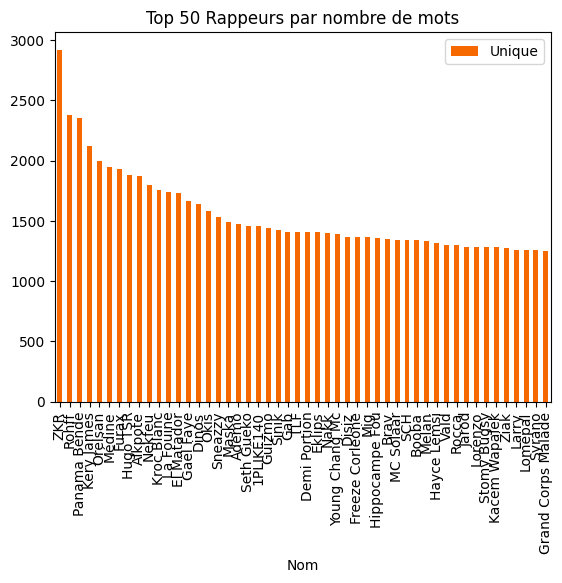

In [100]:
# Trier le DataFrame par la colonne 'Stats' en ordre décroissant
dg_stat3 = dg_stat3.sort_values(by='Unique', ascending=False)

print(dg_stat3)

# On limite à 50 pour la visualisation si nécessaire
dg_stat3.head(50).plot(kind='bar', x='Nom', y='Unique', color="#f56900", title='Top 50 Rappeurs par nombre de mots')
plt.show()

In [104]:
# Premièrement, on récupère la fréquence totale de chaque mot sur tout le corpus d'artistes
freq_totale = nltk.Counter()

for index, row in dg_stat3.iterrows():
    freq_totale += row['Fréquence']

# Deuxièmement on décide manière un peu arbitraire du nombre de mots les plus fréquents à supprimer. On pourrait afficher un graphe d'évolution du nombre de mots pour se rendre compte et avoir une meilleure heuristique. 
#most_freq = zip(*freq_totale.most_common(100))[0]
most_common = freq_totale.most_common(100)
most_freq = [item[0] for item in most_common]
stopwords = most_freq
print(stopwords)
# On créé notre set de stopwords final qui cumule ainsi les 100 mots les plus fréquents du corpus ainsi que l'ensemble de stopwords par défaut présent dans la librairie NLTK
sw = set()
sw.update(stopwords)
sw.update(tuple(nltk.corpus.stopwords.words('french')))


['j', 'la', 'a', 'de', 'l', 'est', 'le', 'les', 'pas', 'd', 'c', 'on', 'dans', 't', 'et', 'un', 'des', 'qu', 'je', 'tu', 'ai', 'en', 'que', 'm', 'suis', 'pour', 's', 'comme', 'qui', 'du', 'mon', 'me', 'ma', 'sur', 'moi', 'mais', 'ca', 'une', 'y', 'si', 'plus', 'n', 'tout', 'au', 'te', 'elle', 'mes', 'il', 'quand', 'fait', 'i', 'ou', 'ce', 'faire', 'fais', 'ils', 'meme', 'es', 'avec', 'ne', 'ouais', 'toi', 'nous', 'vie', 'veux', 'as', 'ta', 'se', 'ton', 'tous', 'trop', 'e', 'faut', 'bien', 'sais', 'oh', 'rien', 'va', 'sans', 'son', 'p', 'sont', 'yeah', 'the', 'o', 'tes', 'par', 'jamais', 'r', 'etre', 'dit', 'vais', 'you', 'sous', 'temps', 'ah', 'eh', 'ont', 'monde', 'aime']


In [107]:
dg["Paroles nettoyees"] =  dg["Paroles tokenized"].apply(lambda x: [w for w in x if not w in list(sw)])

In [108]:
dg

,Nom,Chanson,Paroles,Paroles cleaned,Paroles tokenized,Paroles nettoyees
0,1PLIKÉ140,FREESTYLE HORS SÉRIE,"Gang, gang J'perds pas mon temps sur des ...","gang, gang j'perds pas mon temps sur des ...","[gang, gang, j, perds, pas, mon, temps, sur, d...","[gang, gang, perds, plans, rapportent, nada, p..."
1,1PLIKÉ140,CANADA,"Mmh, mmh, mmh, mmh Mmh, mmh, mmh L'habit n...","mmh, mmh, mmh, mmh mmh, mmh, mmh l'habit n...","[mmh, mmh, mmh, mmh, mmh, mmh, mmh, l, habit, ...","[mmh, mmh, mmh, mmh, mmh, mmh, mmh, habit, moi..."
2,1PLIKÉ140,FREESTYLE BATARD #2,"Partie 1 Beaucoup d'rappeurs, j'suis obligé...","partie 1 beaucoup d'rappeurs, j'suis oblige...","[partie, 1, beaucoup, d, rappeurs, j, suis, ob...","[partie, 1, beaucoup, rappeurs, oblige, diff, ..."
3,1PLIKÉ140,DANS MON ASSIETTE,Binks Beatz Il reste du te-shi sur le cou...,binks beatz il reste du te-shi sur le cou...,"[binks, beatz, il, reste, du, te, shi, sur, le...","[binks, beatz, reste, shi, couteau, enfonce, c..."
4,1PLIKÉ140,FREESTYLE BATARD #3,Comme d’habitude j’ai la bonbonne sur moi D...,comme d'habitude j'ai la bonbonne sur moi d...,"[comme, d, habitude, j, ai, la, bonbonne, sur,...","[habitude, bonbonne, donc, couilles, demangent..."
...,...,...,...,...,...,...
1674,Zuukou Mayzie,Docteur Lulu,"Risky Business Docteur Lulu J'débarque, ...","risky business docteur lulu j'debarque, ...","[risky, business, docteur, lulu, j, debarque, ...","[risky, business, docteur, lulu, debarque, jog..."
1675,Zuukou Mayzie,Pépé Anglais,"S/o le Flem Grr, paw, paw Crr, crr B G Bo...","s/o le flem grr, paw, paw crr, crr b g bo...","[s, o, le, flem, grr, paw, paw, crr, crr, b, g...","[flem, grr, paw, paw, crr, crr, b, g, boys, cl..."
1676,Zuukou Mayzie,Kevin Mitnick,Kevin Mitnick est un informaticien déjanté...,kevin mitnick est un informaticien dejante...,"[kevin, mitnick, est, un, informaticien, dejan...","[kevin, mitnick, informaticien, dejante, genie..."
1677,Zuukou Mayzie,Vincent,"Le Z (le Z, le Z) Phénoménal, brillant,...","le z (le z, le z) phenomenal, brillant,...","[le, z, le, z, le, z, phenomenal, brillant, pe...","[z, z, z, phenomenal, brillant, percutant, zuu..."


In [112]:
dg_stat4 = pd.DataFrame(columns=["Nom", "Fréquence", "Total", "Unique"])

old_name = ''
fzz = []
tot = 0
first = "Y"
for index, row in dg.iterrows():
    nom = row['Nom']
    paroles = row['Paroles nettoyees'].copy()
    if nom != old_name and first == "N":
        freq = nltk.FreqDist(fzz)
        uniq = len(freq.keys())
        dg_stat4 = pd.concat([dg_stat4, pd.DataFrame({"Nom": [old_name], "Fréquence" : [freq], "Total" : [tot], "Unique" : [uniq]})], ignore_index=True)
        fzz = paroles
        tot = len(paroles)
    else:
        first = "N"
        fzz.extend(paroles)
        tot += len(paroles)

    old_name = nom

if f:
    freq = nltk.FreqDist(fzz)
    uniq = len(freq.keys())
    dg_stat4 = pd.concat([dg_stat4, pd.DataFrame({"Nom": [old_name], "Fréquence" : [freq], "Total" : [tot], "Unique" : [uniq]})], ignore_index=True)

dg_stat4

,Nom,Fréquence,Total,Unique
0,1PLIKÉ140,"{'gang': 3, 'perds': 7, 'plans': 1, 'rapporten...",3258,1344
1,2zer Washington,"{'he': 4, 'neslet': 1, 'franchement': 2, 'kiff...",306,219
2,20syl,"{'keep': 15, 'it': 34, 'level': 15, 'whoa': 12...",853,247
3,Abd al Malik,"{'detroit': 13, 'gibraltar': 14, 'jeune': 14, ...",1873,892
4,Ademo,"{'jungle': 1, 'appelle': 8, 'mowgli': 1, 'seum...",2429,1351
...,...,...,...,...
303,Ziak,"{'focus': 3, 'beatz': 3, 'han': 2, '3endi': 2,...",2204,1158
304,ZKR,"{'b': 13, 'nouveau': 17, 'roubaix': 30, 'z': 2...",6088,2792
305,Zola,"{'connais': 3, 'meufs': 7, 'canalise': 1, 'pro...",2234,1040
306,Zoxea,"{'tenais': 2, 'tube': 2, 'tete': 3, 'paroles':...",232,203


In [ ]:
# Premièrement, on récupère la fréquence totale de chaque mot sur tout le corpus d'artistes
freq_totale = nltk.Counter()

for index, row in dg_stat3.iterrows():
    freq_totale += row['Fréquence']

# Deuxièmement on décide manière un peu arbitraire du nombre de mots les plus fréquents à supprimer. On pourrait afficher un graphe d'évolution du nombre de mots pour se rendre compte et avoir une meilleure heuristique. 
#most_freq = zip(*freq_totale.most_common(100))[0]
most_common = freq_totale.most_common(100)
most_freq = [item[0] for item in most_common]
stopwords = most_freq
print(stopwords)
# On créé notre set de stopwords final qui cumule ainsi les 100 mots les plus fréquents du corpus ainsi que l'ensemble de stopwords par défaut présent dans la librairie NLTK
sw = set()
sw.update(stopwords)
sw.update(tuple(nltk.corpus.stopwords.words('french')))


['j', 'la', 'a', 'de', 'l', 'est', 'le', 'les', 'pas', 'd', 'c', 'on', 'dans', 't', 'et', 'un', 'des', 'qu', 'je', 'tu', 'ai', 'en', 'que', 'm', 'suis', 'pour', 's', 'comme', 'qui', 'du', 'mon', 'me', 'ma', 'sur', 'moi', 'mais', 'ca', 'une', 'y', 'si', 'plus', 'n', 'tout', 'au', 'te', 'elle', 'mes', 'il', 'quand', 'fait', 'i', 'ou', 'ce', 'faire', 'fais', 'ils', 'meme', 'es', 'avec', 'ne', 'ouais', 'toi', 'nous', 'vie', 'veux', 'as', 'ta', 'se', 'ton', 'tous', 'trop', 'e', 'faut', 'bien', 'sais', 'oh', 'rien', 'va', 'sans', 'son', 'p', 'sont', 'yeah', 'the', 'o', 'tes', 'par', 'jamais', 'r', 'etre', 'dit', 'vais', 'you', 'sous', 'temps', 'ah', 'eh', 'ont', 'monde', 'aime']


              Nom                                          Fréquence Total  \
304           ZKR  {'b': 13, 'nouveau': 17, 'roubaix': 30, 'z': 2...  6088   
239         Rohff  {'swag': 1, 'x': 1, 'v': 8, 'france': 1, 'ambi...  3660   
220  Panama Bende  {'demarre': 2, 'mort': 4, 'gueule': 6, 'cousin...  4306   
115    Kery James  {'lettre': 5, 'republiquea': 1, 'racistes': 3,...  3769   
219       Orelsan  {'ok': 2, 'age': 4, 'peu': 14, 'pres': 6, 'pas...  3190   
..            ...                                                ...   ...   
79     Faf Larage  {'chaque': 4, 'choix': 8, 'parie': 2, 'contre'...   181   
23          Ben-J  {'im': 7, 'so': 1, 'fly': 1, 'sky': 1, 'high':...   181   
147  Kopp Johnson  {'macron': 9, 'demission': 8, 'demi': 1, 'alle...   476   
257           Six  {'with': 1, 'so': 1, 'many': 1, 'rights': 1, '...   136   
50         Dawala  {'chroniques': 3, 'wati': 3, 'boss': 2, 'volum...    31   

    Unique  
304   2792  
239   2262  
220   2234  
115   1993 

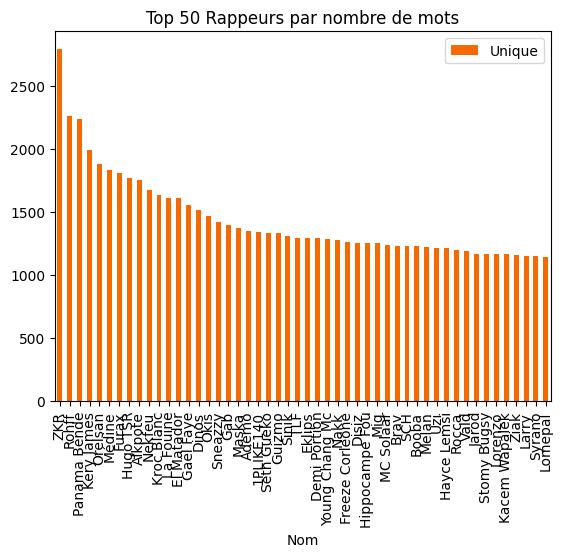

In [113]:
# Trier le DataFrame par la colonne 'Stats' en ordre décroissant
dg_stat4 = dg_stat4.sort_values(by='Unique', ascending=False)

print(dg_stat4)

# On limite à 50 pour la visualisation si nécessaire
dg_stat4.head(50).plot(kind='bar', x='Nom', y='Unique', color="#f56900", title='Top 50 Rappeurs par nombre de mots')
plt.show()

In [115]:
stemmer = FrenchStemmer()

In [120]:
dg["Paroles lemmatised"] =  dg["Paroles nettoyees"].apply(lambda x: [stemmer.stem(w) for w in x])

In [121]:
dg

,Nom,Chanson,Paroles,Paroles cleaned,Paroles tokenized,Paroles nettoyees,Paroles lemmatised,Paroles lemmatised
0,1PLIKÉ140,FREESTYLE HORS SÉRIE,"Gang, gang J'perds pas mon temps sur des ...","gang, gang j'perds pas mon temps sur des ...","[gang, gang, j, perds, pas, mon, temps, sur, d...","[gang, gang, perds, plans, rapportent, nada, p...","[gang, gang, perd, plan, rapportent, nad, poh,...","[gang, gang, perd, plan, rapportent, nad, poh,..."
1,1PLIKÉ140,CANADA,"Mmh, mmh, mmh, mmh Mmh, mmh, mmh L'habit n...","mmh, mmh, mmh, mmh mmh, mmh, mmh l'habit n...","[mmh, mmh, mmh, mmh, mmh, mmh, mmh, l, habit, ...","[mmh, mmh, mmh, mmh, mmh, mmh, mmh, habit, moi...","[mmh, mmh, mmh, mmh, mmh, mmh, mmh, hab, moin,...","[mmh, mmh, mmh, mmh, mmh, mmh, mmh, hab, moin,..."
2,1PLIKÉ140,FREESTYLE BATARD #2,"Partie 1 Beaucoup d'rappeurs, j'suis obligé...","partie 1 beaucoup d'rappeurs, j'suis oblige...","[partie, 1, beaucoup, d, rappeurs, j, suis, ob...","[partie, 1, beaucoup, rappeurs, oblige, diff, ...","[part, 1, beaucoup, rappeur, oblig, diff, vu, ...","[part, 1, beaucoup, rappeur, oblig, diff, vu, ..."
3,1PLIKÉ140,DANS MON ASSIETTE,Binks Beatz Il reste du te-shi sur le cou...,binks beatz il reste du te-shi sur le cou...,"[binks, beatz, il, reste, du, te, shi, sur, le...","[binks, beatz, reste, shi, couteau, enfonce, c...","[bink, beatz, rest, shi, couteau, enfonc, corp...","[bink, beatz, rest, shi, couteau, enfonc, corp..."
4,1PLIKÉ140,FREESTYLE BATARD #3,Comme d’habitude j’ai la bonbonne sur moi D...,comme d'habitude j'ai la bonbonne sur moi d...,"[comme, d, habitude, j, ai, la, bonbonne, sur,...","[habitude, bonbonne, donc, couilles, demangent...","[habitud, bonbon, donc, couill, demangent, all...","[habitud, bonbon, donc, couill, demangent, all..."
...,...,...,...,...,...,...,...,...
1674,Zuukou Mayzie,Docteur Lulu,"Risky Business Docteur Lulu J'débarque, ...","risky business docteur lulu j'debarque, ...","[risky, business, docteur, lulu, j, debarque, ...","[risky, business, docteur, lulu, debarque, jog...","[risky, business, docteur, lulu, debarqu, jogg...","[risky, business, docteur, lulu, debarqu, jogg..."
1675,Zuukou Mayzie,Pépé Anglais,"S/o le Flem Grr, paw, paw Crr, crr B G Bo...","s/o le flem grr, paw, paw crr, crr b g bo...","[s, o, le, flem, grr, paw, paw, crr, crr, b, g...","[flem, grr, paw, paw, crr, crr, b, g, boys, cl...","[flem, grr, paw, paw, crr, crr, b, g, boy, clu...","[flem, grr, paw, paw, crr, crr, b, g, boy, clu..."
1676,Zuukou Mayzie,Kevin Mitnick,Kevin Mitnick est un informaticien déjanté...,kevin mitnick est un informaticien dejante...,"[kevin, mitnick, est, un, informaticien, dejan...","[kevin, mitnick, informaticien, dejante, genie...","[kevin, mitnick, informaticien, dej, gen, forc...","[kevin, mitnick, informaticien, dej, gen, forc..."
1677,Zuukou Mayzie,Vincent,"Le Z (le Z, le Z) Phénoménal, brillant,...","le z (le z, le z) phenomenal, brillant,...","[le, z, le, z, le, z, phenomenal, brillant, pe...","[z, z, z, phenomenal, brillant, percutant, zuu...","[z, z, z, phenomenal, brill, percut, zuukou, m...","[z, z, z, phenomenal, brill, percut, zuukou, m..."


In [119]:
dg_stat5 = pd.DataFrame(columns=["Nom", "Fréquence", "Total", "Unique"])

old_name = ''
fzz = []
tot = 0
first = "Y"
for index, row in dg.iterrows():
    nom = row['Nom']
    paroles = row['Paroles lemmatised'].copy()
    if nom != old_name and first == "N":
        freq = nltk.FreqDist(fzz)
        uniq = len(freq.keys())
        dg_stat5 = pd.concat([dg_stat5, pd.DataFrame({"Nom": [old_name], "Fréquence" : [freq], "Total" : [tot], "Unique" : [uniq]})], ignore_index=True)
        fzz = paroles
        tot = len(paroles)
    else:
        first = "N"
        fzz.extend(paroles)
        tot += len(paroles)

    old_name = nom

if f:
    freq = nltk.FreqDist(fzz)
    uniq = len(freq.keys())
    dg_stat5 = pd.concat([dg_stat5, pd.DataFrame({"Nom": [old_name], "Fréquence" : [freq], "Total" : [tot], "Unique" : [uniq]})], ignore_index=True)

dg_stat5

,Nom,Fréquence,Total,Unique
0,1PLIKÉ140,"{'gang': 3, 'perd': 7, 'plan': 6, 'rapportent'...",3258,1150
1,2zer Washington,"{'he': 4, 'neslet': 1, 'franch': 2, 'kiff': 2,...",306,208
2,20syl,"{'keep': 15, 'it': 34, 'level': 15, 'who': 13,...",853,243
3,Abd al Malik,"{'detroit': 13, 'gibraltar': 14, 'jeun': 21, '...",1873,800
4,Ademo,"{'jungl': 1, 'appel': 10, 'mowgl': 1, 'seum': ...",2429,1190
...,...,...,...,...
303,Ziak,"{'focus': 3, 'beatz': 3, 'han': 2, '3end': 2, ...",2204,1047
304,ZKR,"{'b': 13, 'nouveau': 25, 'roubaix': 30, 'z': 2...",6088,2307
305,Zola,"{'con': 8, 'meuf': 9, 'canalis': 1, 'problem':...",2234,931
306,Zoxea,"{'ten': 2, 'tub': 2, 'tet': 3, 'parol': 4, 'mu...",232,200


              Nom                                          Fréquence Total  \
304           ZKR  {'b': 13, 'nouveau': 25, 'roubaix': 30, 'z': 2...  6088   
239         Rohff  {'swag': 1, 'x': 1, 'v': 8, 'franc': 3, 'ambia...  3660   
220  Panama Bende  {'demarr': 2, 'mort': 4, 'gueul': 6, 'cousin':...  4306   
186        Médine  {'grand': 70, 'paris': 56, 'banlieu': 4, 'paqu...  2897   
115    Kery James  {'lettr': 7, 'republiqu': 1, 'racist': 3, 'tol...  3769   
..            ...                                                ...   ...   
79     Faf Larage  {'chaqu': 4, 'choix': 8, 'pari': 2, 'contr': 3...   181   
23          Ben-J  {'im': 7, 'so': 1, 'fly': 1, 'sky': 1, 'high':...   181   
147  Kopp Johnson  {'macron': 9, 'demiss': 8, 'dem': 1, 'allez': ...   476   
257           Six  {'with': 1, 'so': 1, 'many': 1, 'right': 2, 'w...   136   
50         Dawala  {'chroniqu': 3, 'wat': 3, 'boss': 2, 'volum': ...    31   

    Unique  
304   2307  
239   1945  
220   1938  
186   1644 

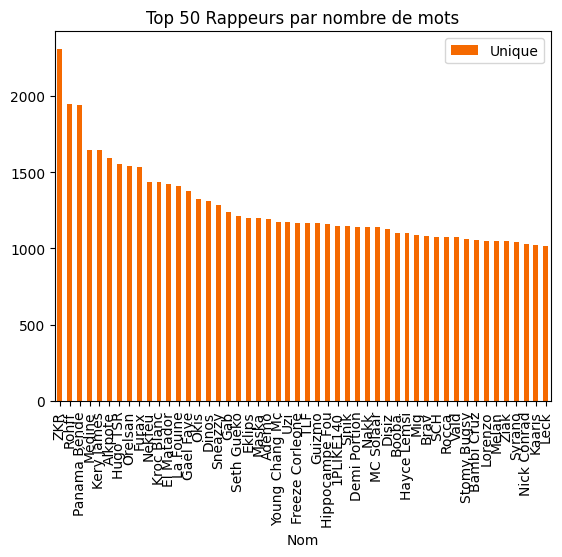

In [122]:
# Trier le DataFrame par la colonne 'Stats' en ordre décroissant
dg_stat5 = dg_stat5.sort_values(by='Unique', ascending=False)

print(dg_stat5)

# On limite à 50 pour la visualisation si nécessaire
dg_stat5.head(50).plot(kind='bar', x='Nom', y='Unique', color="#f56900", title='Top 50 Rappeurs par nombre de mots')
plt.show()

Le stemmer et le lemmentizer de NLTK ne sont pas très “puissants”. Est-ce que la librairie spacy nous propose des outils plus intéressants ? 

En pratique, on peut prendre les quelques mots précédents qui représentent assez d'information pour avoir un modèle séquentiel (markovien) intéressant, d'où l'apparition des n-grammes.

Par exemple on peut assigner une probabilité au bigramme ("je", "mange") :

p(mange| je)=p(mange,je)p(mange)p(je)

En pratique, on peut aussi utiliser la fonction  bigrams  de NLTK

In [123]:
test = "Bonjour, je suis un texte d'exemple pour le cours d'Openclassrooms. Soyez attentifs à ce cours !"
tokens = tokenizer.tokenize(test.lower())
list(nltk.bigrams(tokens))

[('bonjour', 'je'),
 ('je', 'suis'),
 ('suis', 'un'),
 ('un', 'texte'),
 ('texte', 'd'),
 ('d', 'exemple'),
 ('exemple', 'pour'),
 ('pour', 'le'),
 ('le', 'cours'),
 ('cours', 'd'),
 ('d', 'openclassrooms'),
 ('openclassrooms', 'soyez'),
 ('soyez', 'attentifs'),
 ('attentifs', 'à'),
 ('à', 'ce'),
 ('ce', 'cours')]

In [ ]:
import os
def stem_tokens(tokens, stemmer):
    stemmed = []
    for item in tokens:
        stemmed.append(stemmer.stem(item))
    return stemmed

def tokenize(text):
    tokens = nltk.word_tokenize(text)
    stems = stem_tokens(tokens, stemmer)
    return stems

for subdir, dirs, files in os.walk(path):
    for file in files:
        file_path = subdir + os.path.sep + file
        shakes = open(file_path, 'r')
        text = shakes.read()
        lowers = text.lower()
        no_punctuation = lowers.translate(None, string.punctuation)
        token_dict[file] = no_punctuation
 
tfidf = TfidfVectorizer(tokenizer=tokenize, stop_words=sw)
values = tfidf.fit_transform(token_dict.values())

La récupération de caractéristiques va assez loin puisqu'on essaie de dégager de nos documents texte non structurés des informations structurées informatives très restreintes :

NER (Named Entity Recognition) : reconnaître des personnes, endroits, entreprises, etc.

Extraction de relations : essayer d'extraire des relations sémantiques entre différents termes du texte. Par exemple, des relations familiales ("Marie est l'enfant de Patrick") spatiales ("Le piano est devant la fenêtre"), etc. Ces informations peuvent ensuite être stockées dans une base de données relationnelles ou un graphe.

Extraction d'événements : extraire des actions qui arrivent à nos entités. Par exemple "le cours de l'action X a augmenté de 5%" ou bien "le président à déclaré X dans son discours"

POS Tagging (Part-of-Speech Tagging) : représente les méthodes qui récupèrent la nature grammatical des mots d’une phrase - nom, verbe, adjectif, etc. Ce sont des propriété qui peuvent servir de caractéristiques utile lors de la création de certains modèles

Afin de calculer les vecteurs qui représentent les mots, les méthodes word2vec utilisent des perceptrons linéaires simples avec une seule couche cachée. L’idée est de compresser notre corpus vers un dictionnaire de vecteurs denses de dimension bien inférieure choisie.

Alternatives à word2vec
En pratique, on peut utiliser d’autres types de représentations denses des mots, au-delà du choix de l’algorithme (CBOW, skipgram) et de la dimension. Il existe notamment d’autres méthodes de plongement (word embeddings) tels que gloVe et FastText.

Certains favorisent même l’utilisation d’une simple décomposition SVD sur une matrice PMI (pointwise mutual information) qui donneraient des performances largement suffisante pour la plupart des applications industrielles.

L’idée fondamentale reste la même : compresser de manière non supervisée la représentation d’un mot à partir d’un gros corpus de texte représentatif de votre langage, afin d’obtenir un vecteur dense qui permet de visualiser et de fournir à nos algorithmes des features plus intéressantes.

Vous pouvez par exemple entraîner votre propre embedding word2vec en suivant ce tutorial : https://radimrehurek.com/gensim/auto_examples/

In [124]:
from sklearn.datasets import fetch_20newsgroups
dataset = fetch_20newsgroups(shuffle=True, random_state=1, remove=('headers', 'footers', 'quotes'))
documents = dataset.data

In [125]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
n_topics = 20


tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2,max_features=1000,stop_words='english')
tf = tf_vectorizer.fit_transform(documents)

# Créer le modèle LDA
lda = LatentDirichletAllocation(
        n_components=n_topics, 
        max_iter=5, 
        learning_method='online', 
        learning_offset=50.,
        random_state=0)

# Fitter sur les données
lda.fit(tf)

LatentDirichletAllocation(learning_method='online', learning_offset=50.0,
                          max_iter=5, n_components=20, random_state=0)

In [127]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic {}:".format(topic_idx))
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

no_top_words = 10
display_topics(lda, tf_vectorizer.get_feature_names_out(), 10)


Topic 0:
people gun state control right guns crime states law police
Topic 1:
time question book years did like don space answer just
Topic 2:
mr line rules science stephanopoulos title current define int yes
Topic 3:
key chip keys clipper encryption number des algorithm use bit
Topic 4:
edu com cs vs w7 cx mail uk 17 send
Topic 5:
use does window problem way used point different case value
Topic 6:
windows thanks know help db does dos problem like using
Topic 7:
bike water effect road design media dod paper like turn
Topic 8:
don just like think know people good ve going say
Topic 9:
car new price good power used air sale offer ground
Topic 10:
file available program edu ftp information files use image version
Topic 11:
ax max b8f g9v a86 145 pl 1d9 0t 34u
Topic 12:
government law privacy security legal encryption court fbi technology information
Topic 13:
card bit memory output video color data mode monitor 16
Topic 14:
drive scsi disk mac hard apple drives controller software port
T

Une alternative, NMF
Une autre type de modélisation de sujet automatique non supervisée est NMF (Negative Matrix Factorisation).

In [130]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF

# NMF is able to use tf-idf
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, 
    min_df=2, 
    max_features=1000, 
    stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(documents)
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()

no_topics = 20

# Run NMF
nmf = NMF(n_components=no_topics, random_state=1, l1_ratio=.5, init='nndsvd')
nmf.fit(tfidf)

no_top_words = 10
display_topics(nmf, tfidf_feature_names, no_top_words)


Topic 0:
did right israel time said state law government gun israeli
Topic 1:
card video monitor cards drivers bus vga driver color memory
Topic 2:
god jesus bible believe christ faith christian christians church sin
Topic 3:
game team year games season players play hockey win league
Topic 4:
new 00 sale 10 offer price space shipping 20 condition
Topic 5:
thanks mail advance hi looking info information help address appreciated
Topic 6:
windows file files dos program window problem using running version
Topic 7:
edu soon university cs ftp article email internet pub david
Topic 8:
key chip clipper encryption keys government escrow public algorithm bit
Topic 9:
drive scsi hard drives disk ide floppy controller cd mac
Topic 10:
just ll thought tell work little mean way maybe oh
Topic 11:
does know anybody mean doesn work say program help exist
Topic 12:
people government person things world life group food make lot
Topic 13:
like sounds looks look things lot make really sound thing
Topic 1

c:\Users\david\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\decomposition\_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


: 

Opérez une première classification naïve de sentiments

In [ ]:
import nltk
import os
from tools import ap

def format_sentence(sent):
    return ({ word: True for word in nltk.word_tokenize(sent.decode('utf-8')) })

def load_training_set():
    training = []

    for fp in os.listdir(ap('aclImdb/train/pos')):
        example = '{}/{}'.format(ap('aclImdb/train/pos'), fp)
        with open(example) as fp:
            for i in fp:
                training.append([format_sentence(i), 'pos'])

    for fp in os.listdir(ap('aclImdb/train/neg')):
        example = '{}/{}'.format(ap('aclImdb/train/neg'), fp)
        with open(example) as fp:
            for i in fp:
                training.append([format_sentence(i), 'neg'])

    return training

training = load_training_set()

In [ ]:
from nltk.classify import NaiveBayesClassifier

classifier = NaiveBayesClassifier.train(train)

Je vous invite très fortement à regarder le code d’implémentation du classifieur, voire d’implémenter le vôtre pour comparer les performances et comprendre comment il fonctionne : http://www.nltk.org/_modules/nltk/classify/naivebayes.html 

In [ ]:
classifier.show_most_informative_features(n=25)

In [ ]:
print(accuracy(classifier, test))

Utiliser d’autres types d'algorithmes de classification supervisée

Régression Logistique
SVM, forêts aléatoires

Pour en savoir plus sur les avantages et inconvénients de différents classifieurs, notamment appliquées à la classification de sentiments, vous pouvez consulter cet article simple et efficace: https://www.aclweb.org/anthology/P12-2018. Il s'agit d'un exemple de comparaison qu’il vous sera utile de consulter lors de votre travail préliminaire d’exploration.


Traitez le corpus de textes à l'aide de réseaux de neurones
Attention à ne pas plonger dans ces architectures sans tester au préalable des solutions qui sont en apparence plus simple mais beaucoup plus efficace (en terme de temps de calcul notamment) pour la majorité des problématiques que vous rencontrerez. 

L’architecture de base et ses problèmes : le RNN
LSTM Networks (Long Short Term Memory Networks) (https://colah.github.io/posts/2015-08-Understanding-LSTMs/) et apres https://github.com/karpathy/char-rnn
